In [1]:
import os
from IPython.display import display

In [2]:
# ROOT contais the project directory
os.chdir(os.path.dirname(os.getcwd()))

In [3]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

from src.Fundus import Fundus
from sklearn.cluster import AgglomerativeClustering

In [4]:
original = Fundus("data/noma/female_rank_0.png")

In [5]:
original.palette.shape

(46675, 3)

In [6]:
cluster = AgglomerativeClustering(n_clusters=len(original.palette)//2, affinity='euclidean', linkage='ward')  
clustered = cluster.fit_predict(original.palette)
print("Total number of colors before",len(clustered))
print("Total number of colors after ",len(np.unique(clustered)))

Total number of colors before 46675
Total number of colors after  23337


In [7]:
clustered

array([18425, 18425, 17417, ..., 14530,  5994,  5994])

In [8]:
nc, cc = np.unique(clustered, return_counts=True)

In [9]:
np.unique(np.sort(cc), return_counts=True)

(array([1, 2, 3, 4]), array([ 2595, 18743,  1402,   597]))

In [10]:
original.palette[clustered==0]

array([[ 92,  52, 136],
       [ 92,  52, 140],
       [ 92,  56, 136],
       [ 92,  56, 140]], dtype=uint8)

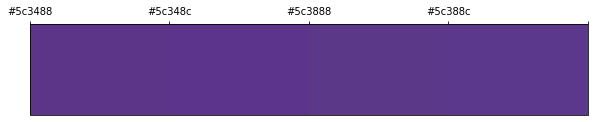

In [11]:
Fundus.plot_color_bar(original.palette[clustered==0])

In [12]:
new_pixels = list()

for c in np.unique(clustered):
    if len(original.palette[clustered == c]) > 2:
        new_pixels.append(original.mask(original.palette[clustered == c], inverse=True, replacement=original.palette[clustered == c][0]))

100%|██████████| 3/3 [00:00<00:00, 23.22it/s]


In [14]:
a = np.zeros(new_pixels[0].shape, dtype=np.uint8)
for np in new_pixels:
    a+=np

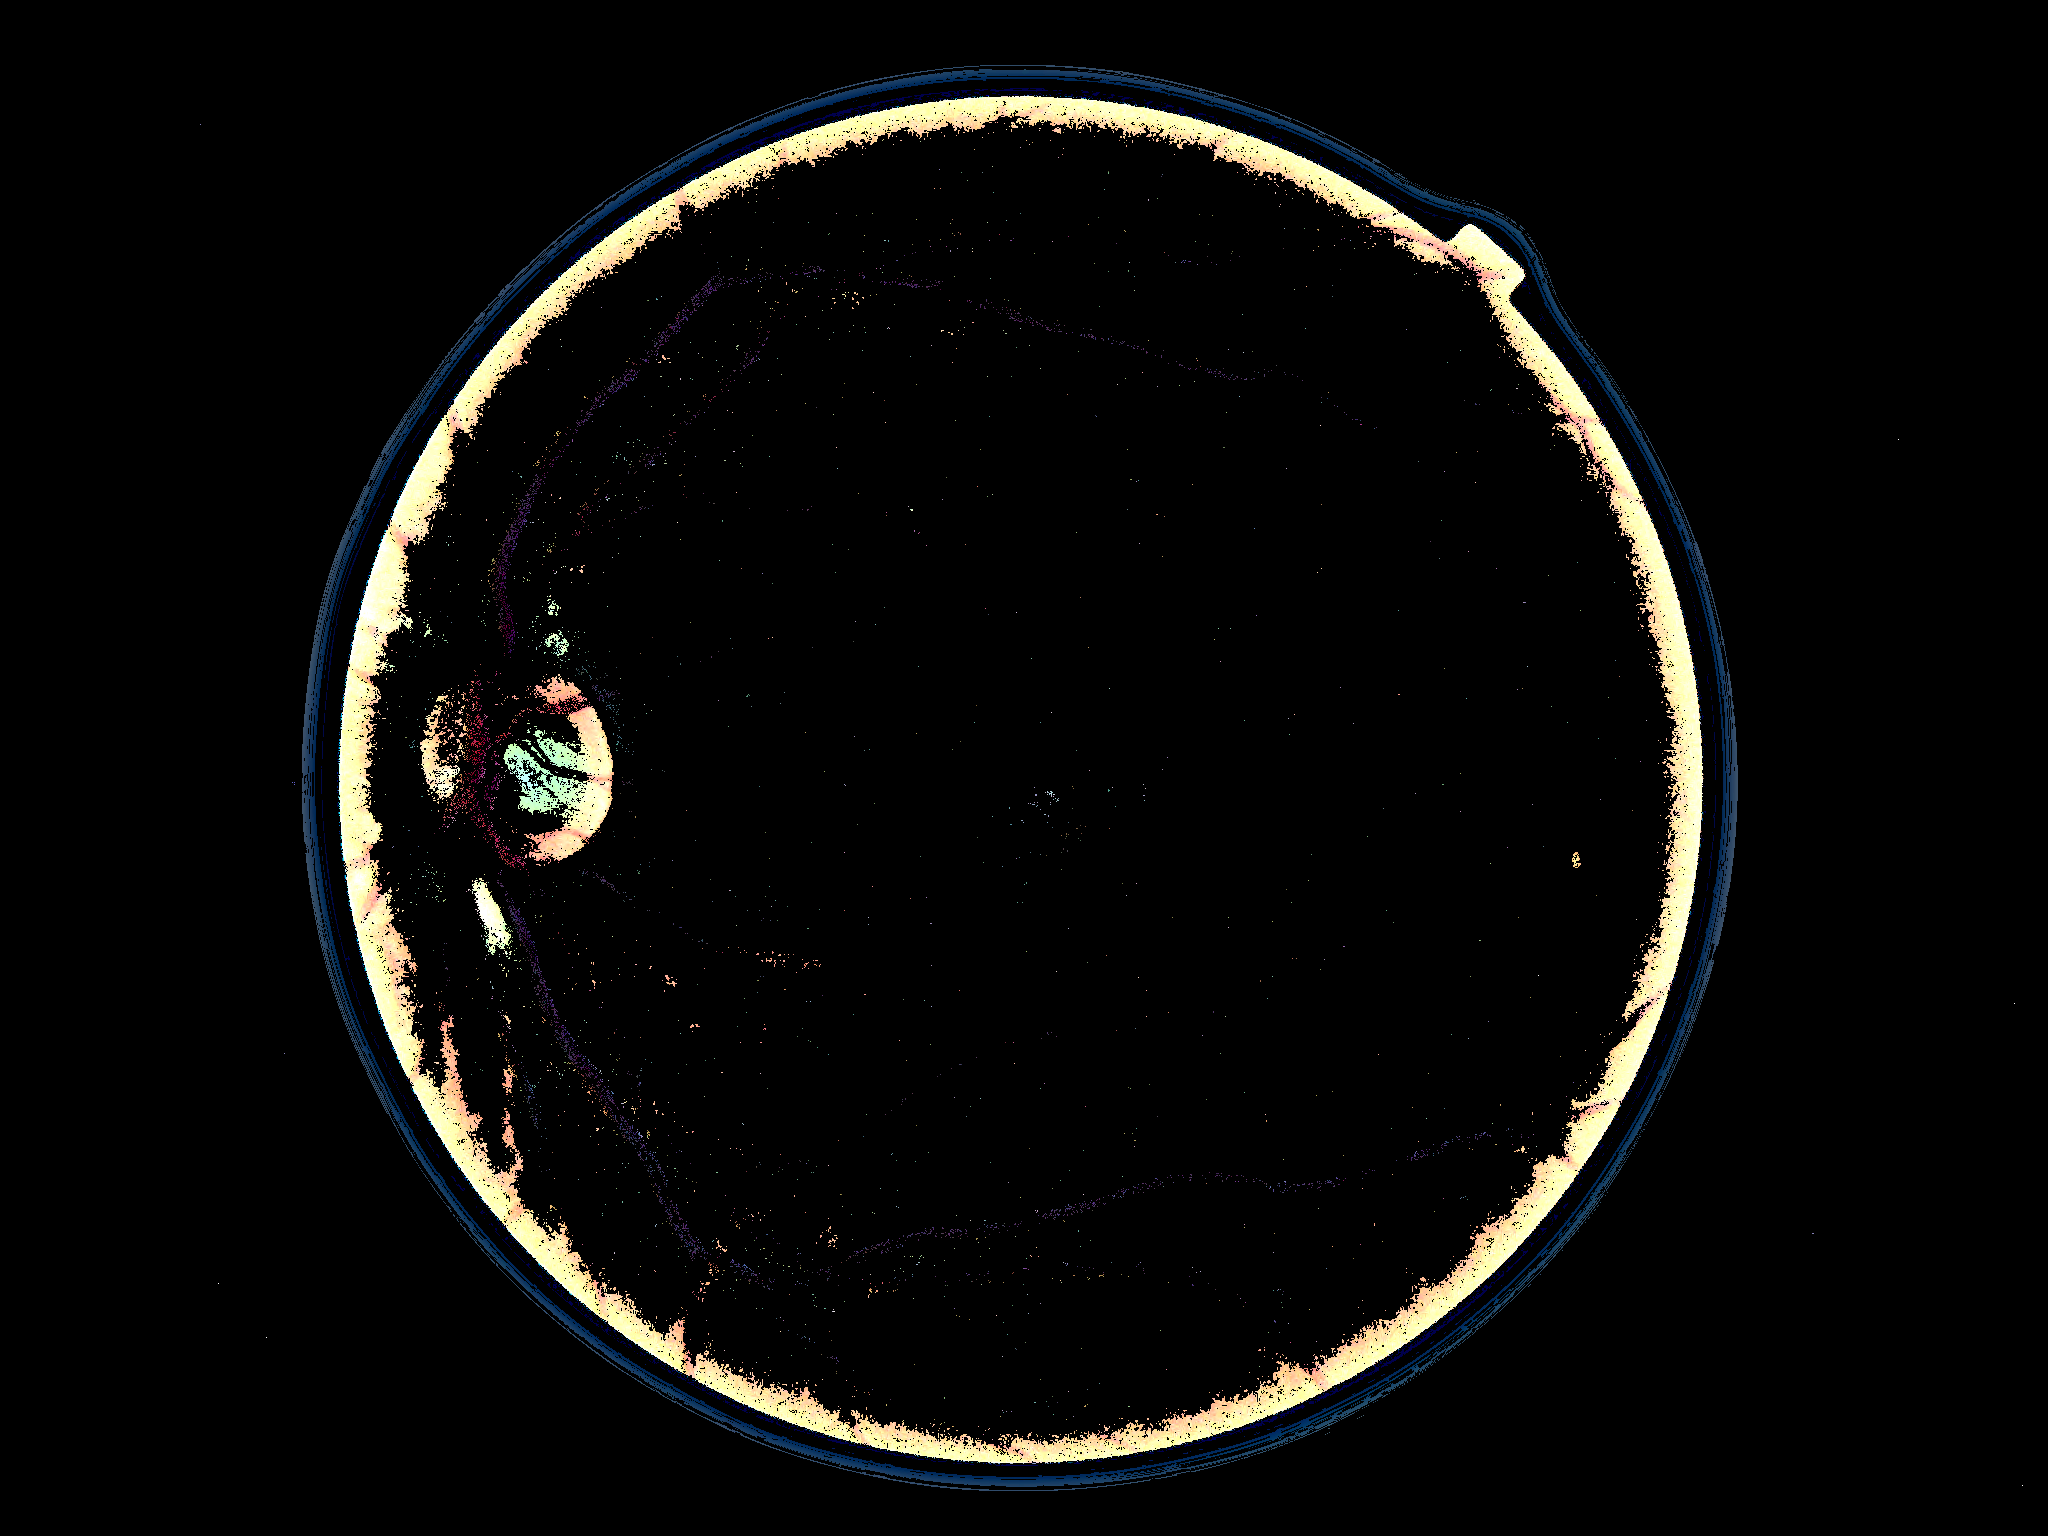

In [15]:
Fundus(a, w=original.im.size[0], h=original.im.size[1]).im